In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
employee_df = pd.read_csv("Dataset/HR-Employee-Attrition.csv")
pd.options.display.max_columns = 0
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [143]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [144]:
employee_df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [145]:
# We replace the 'Attrition', 'Over18', and 'Overtime' columns for better data visualization.
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [146]:
employee_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Attrition'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>],
       [<AxesSubplot: title={'center': 'EmployeeCount'}>,
        <AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>],
       [<AxesSubplot: title={'center': 'JobLevel'}>,
        <AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>],
       [<AxesSubplot: title={'center': 'Over18'}>,
        <AxesSubplot: title={'center': 'OverTime'}>,
        <AxesSubplot: title={'cen

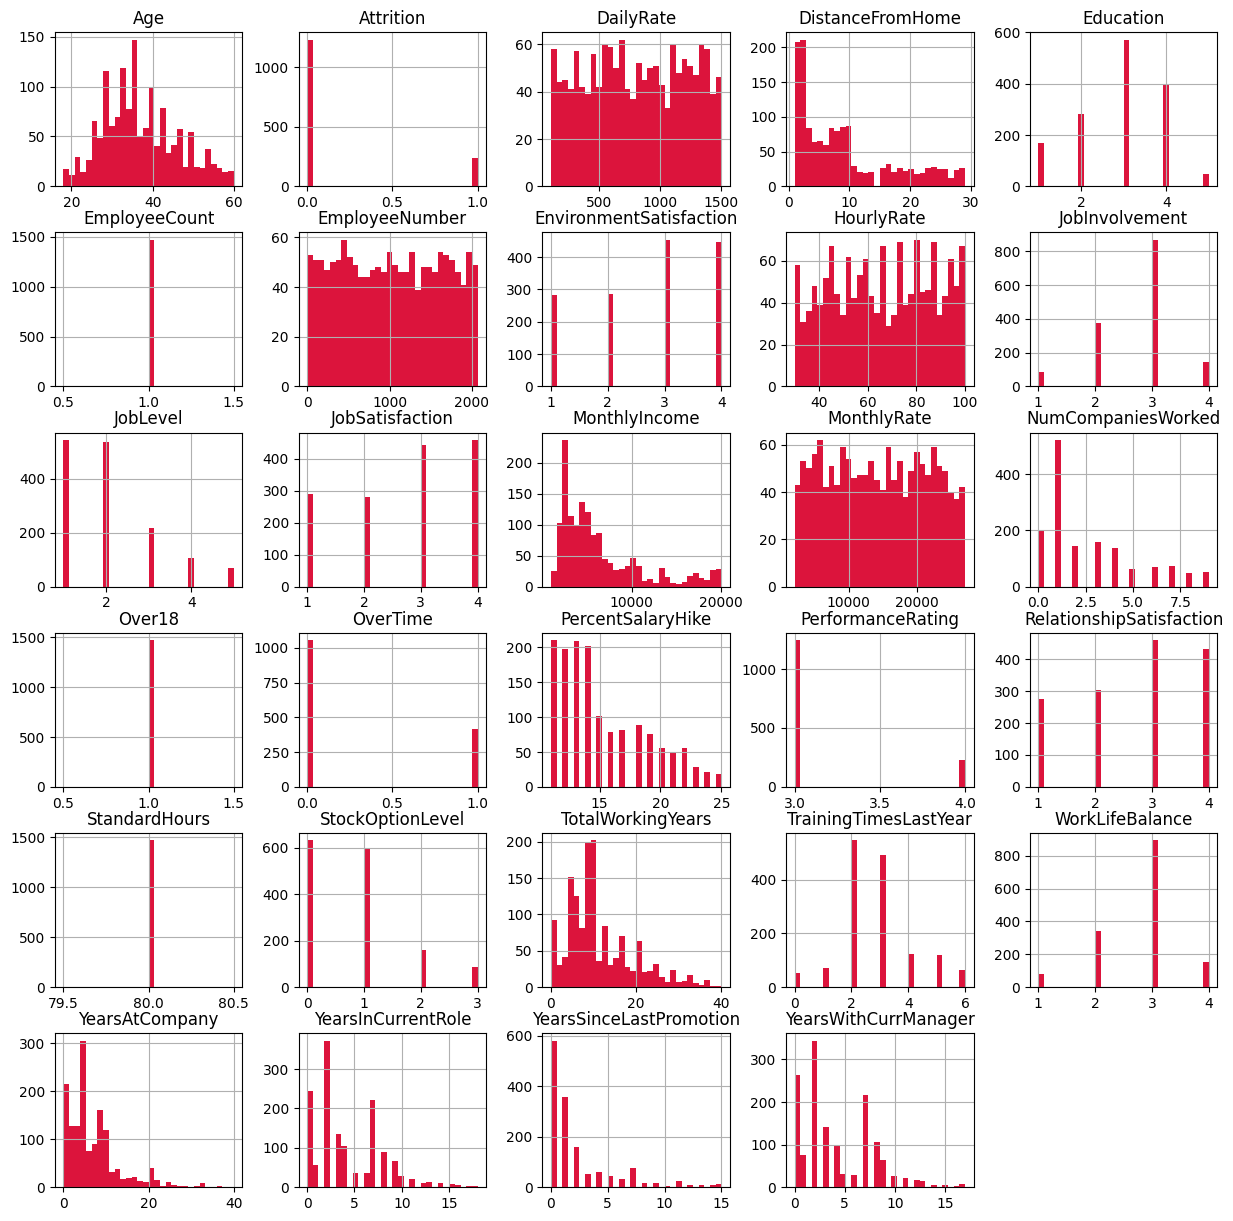

In [147]:
employee_df.hist(bins = 30, figsize=(15,15), color = '#DC143C')

In [148]:
# We remove 'EmployeeCount', 'Standardhours', and 'Over18' because they are variables with only one value type. We also remove 'EmployeeNumber' because it is unique for each variable record.
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

In [149]:
# Study of employees who leave the company

left_df   = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0] 

print("Total number of employees = ", len(employee_df))

print("Number of employees who leave the company = ", len(left_df))
print("Percentage of employees who leave the company = ", 1.*len(left_df)/len(employee_df)*100.0, "%")

print("Number of employees who stay in the company = ", len(stayed_df))
print("Percentage of employees who stay in the company = ", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total number of employees =  1470
Number of employees who leave the company =  237
Percentage of employees who leave the company =  16.122448979591837 %
Number of employees who stay in the company =  1233
Percentage of employees who stay in the company =  83.87755102040816 %


In [150]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [151]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot: >

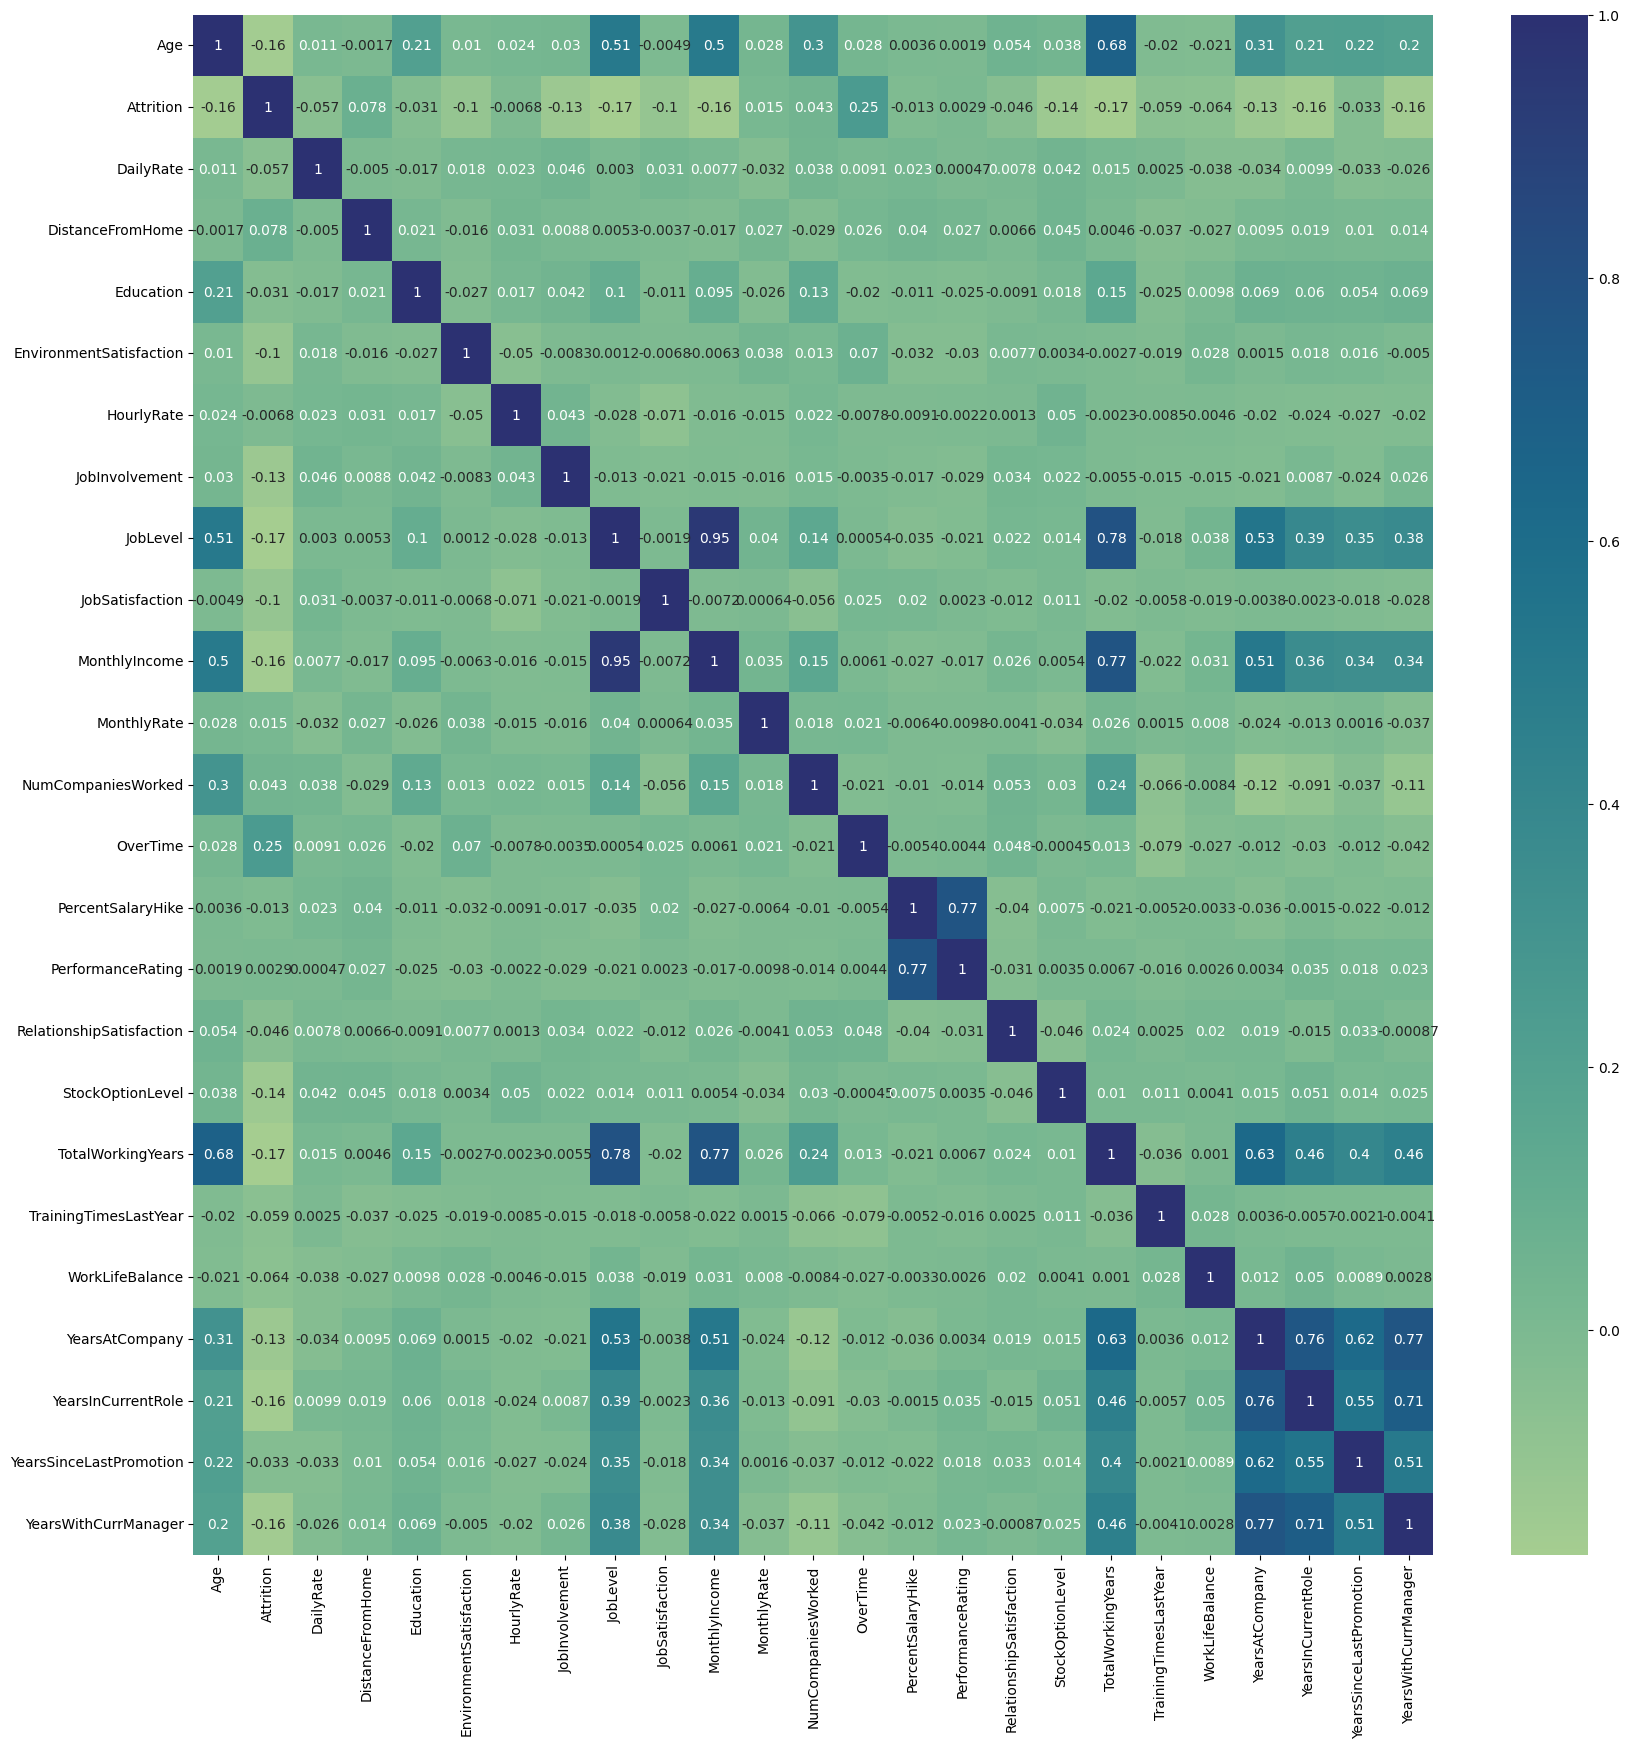

In [152]:
correlations = employee_df.select_dtypes(include=['float64', 'int']).corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True, cmap="crest")

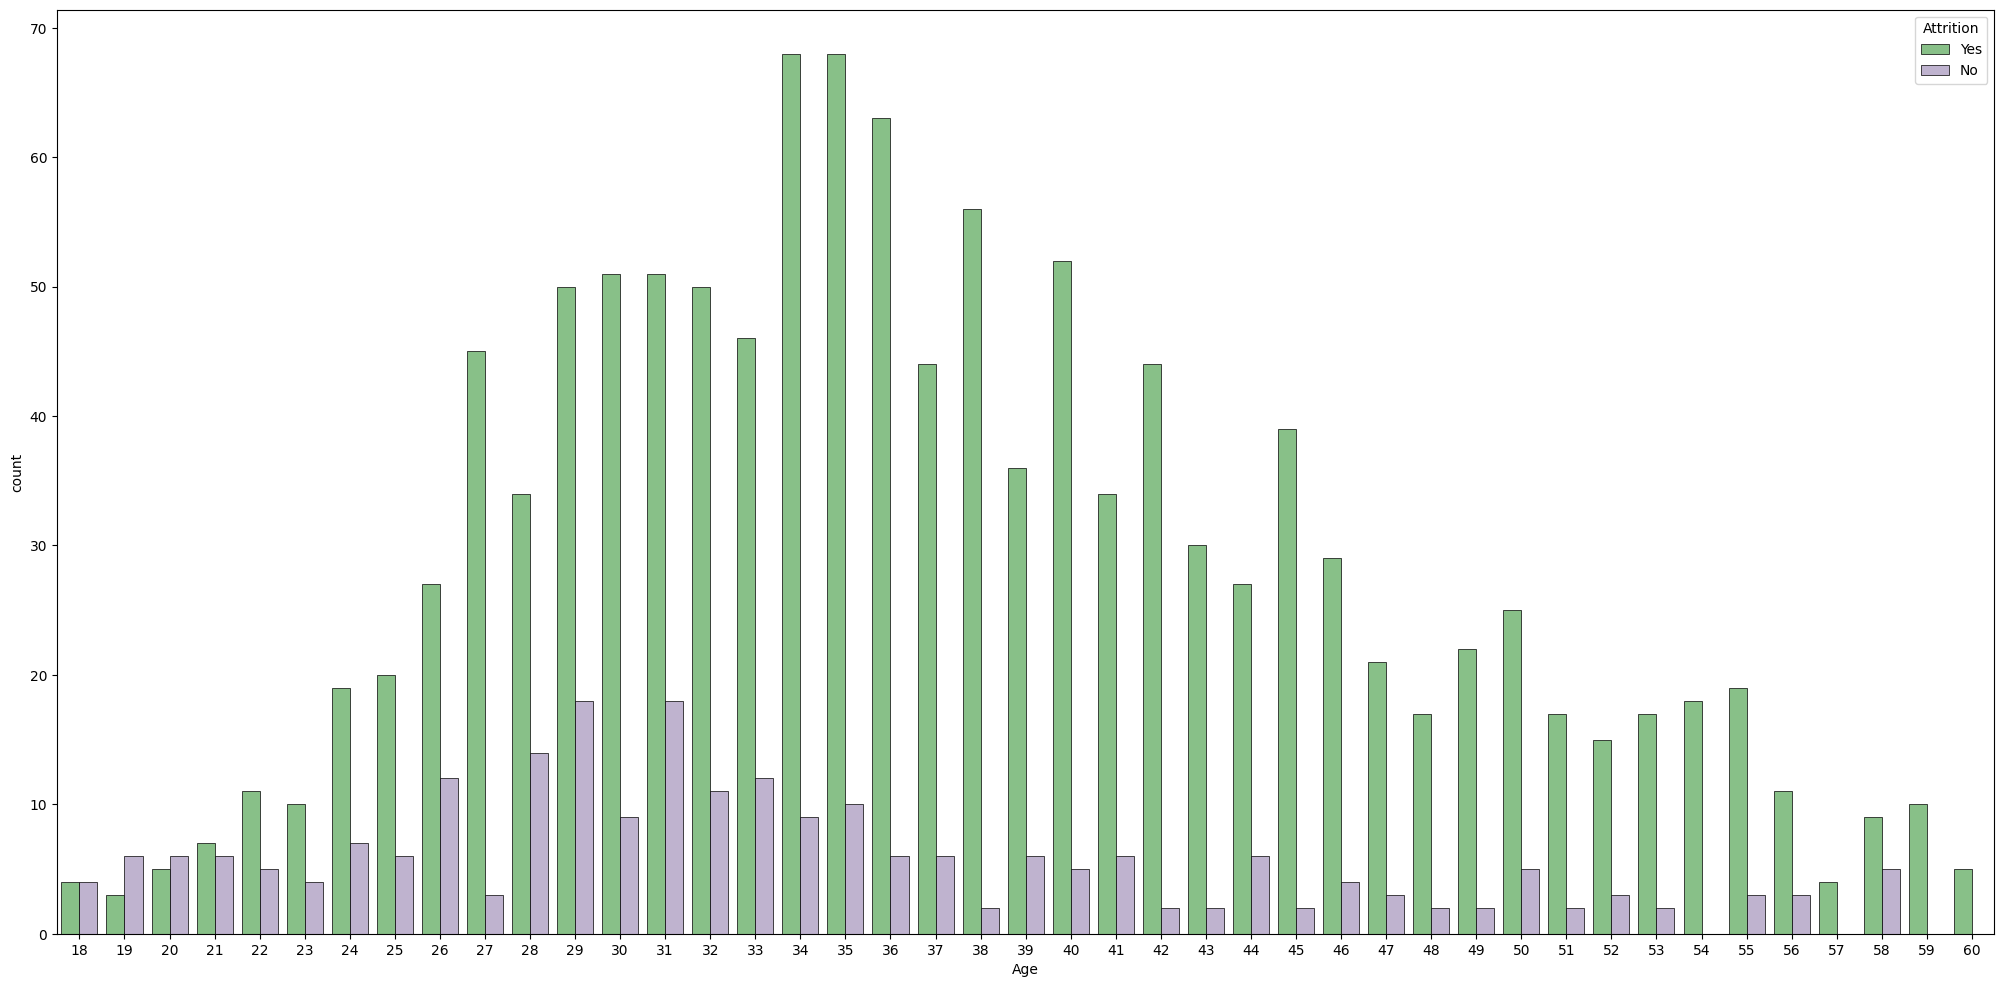

In [153]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df, palette="Accent", edgecolor = "black", linewidth = 0.5)
plt.legend(labels=["Yes","No"], title = "Attrition")

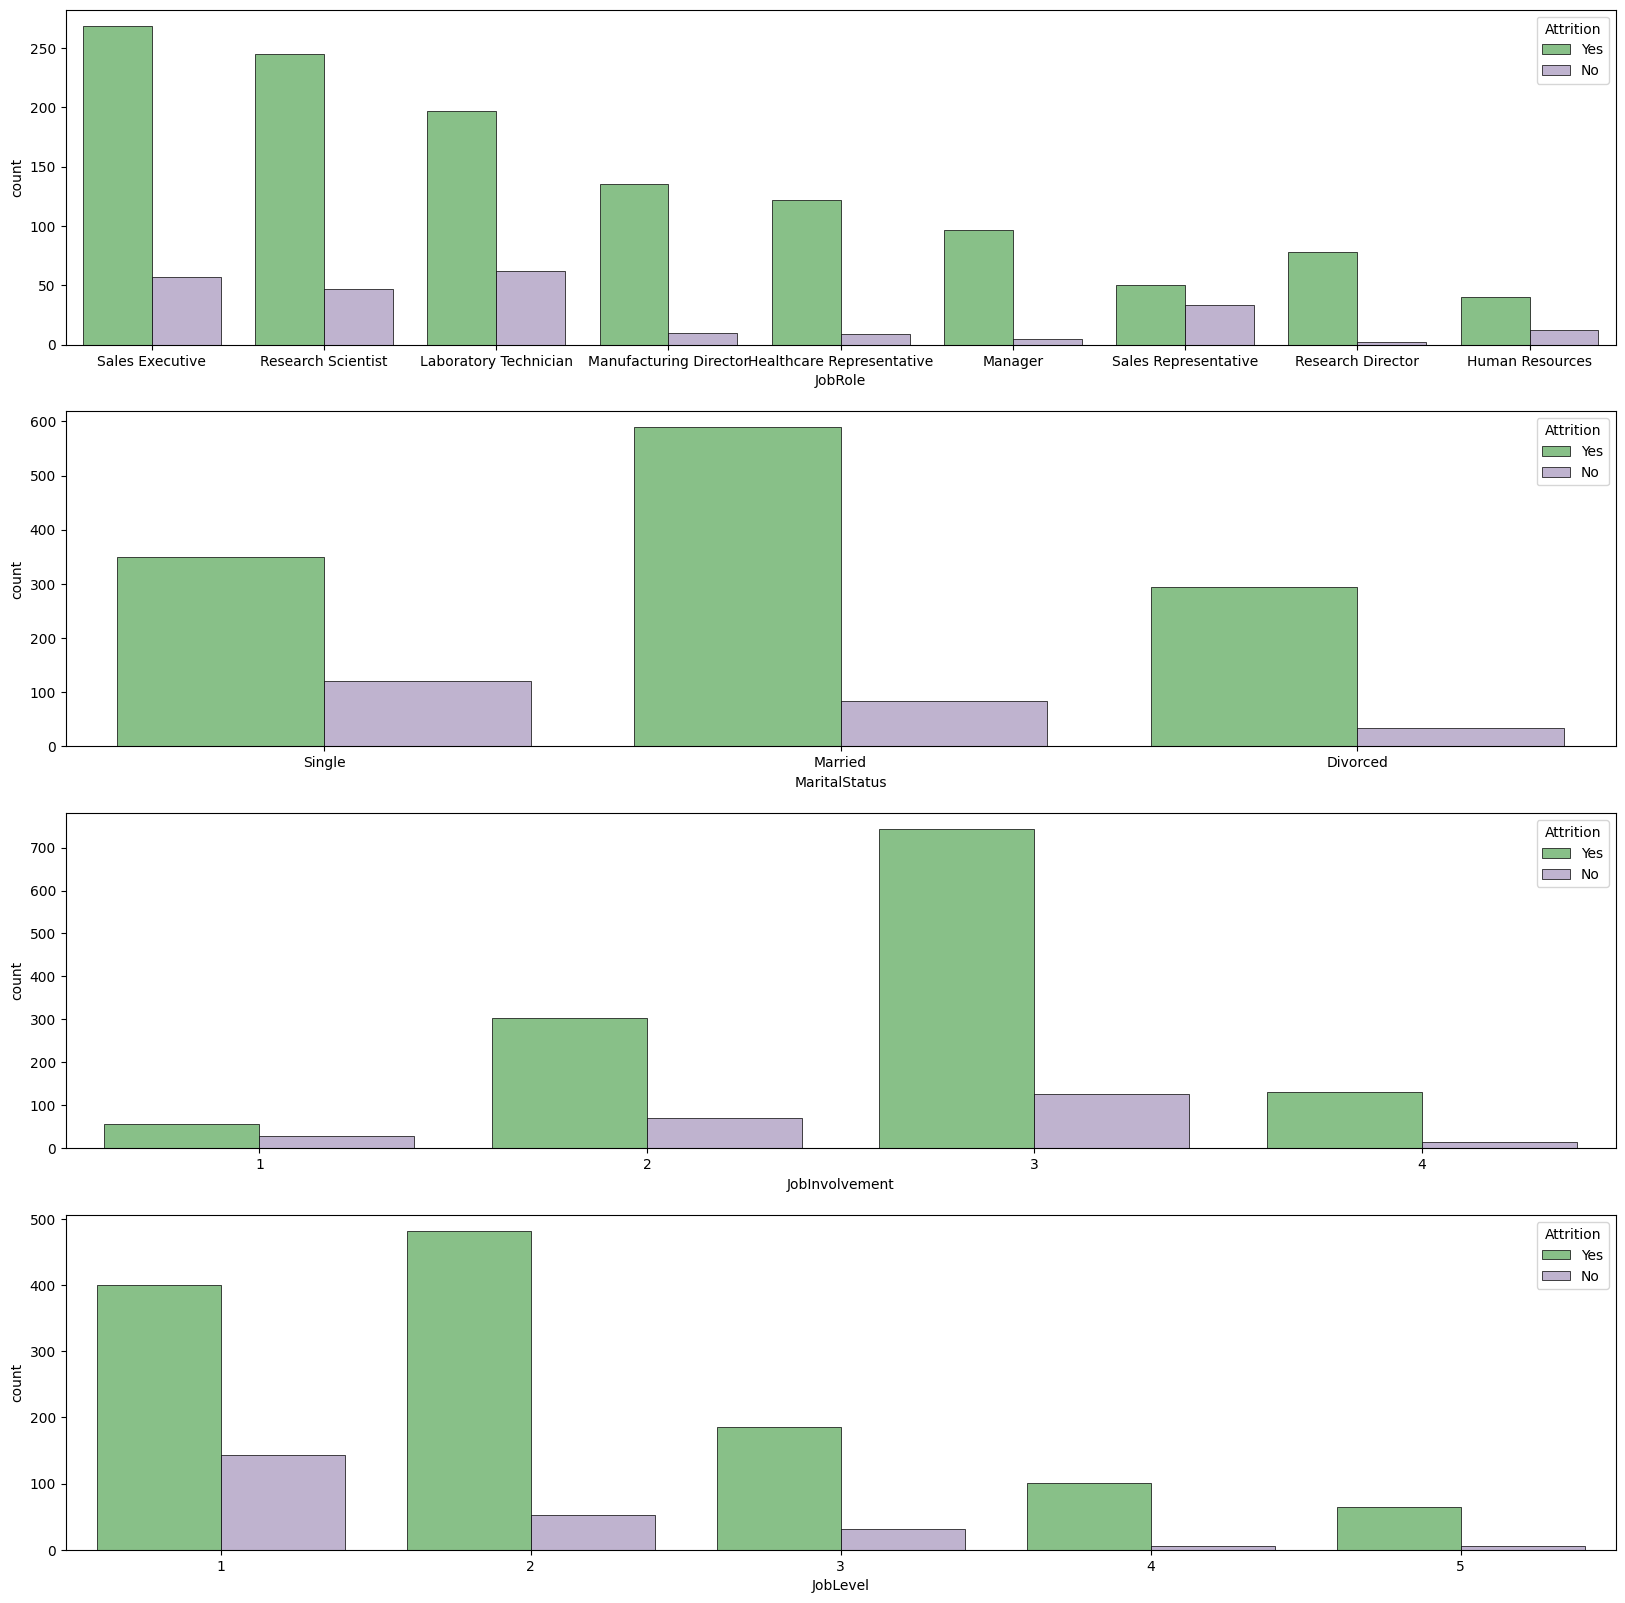

In [154]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df, palette="Accent", edgecolor = "black", linewidth = 0.5)
plt.legend(labels=["Yes","No"], title = "Attrition")
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df, palette="Accent", edgecolor = "black", linewidth = 0.5)
plt.legend(labels=["Yes","No"], title = "Attrition")
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df, palette="Accent", edgecolor = "black", linewidth = 0.5)
plt.legend(labels=["Yes","No"], title = "Attrition")
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df, palette="Accent", edgecolor = "black", linewidth = 0.5)
plt.legend(labels=["Yes","No"], title = "Attrition")

Text(0.5, 0, 'Distance from home to work')

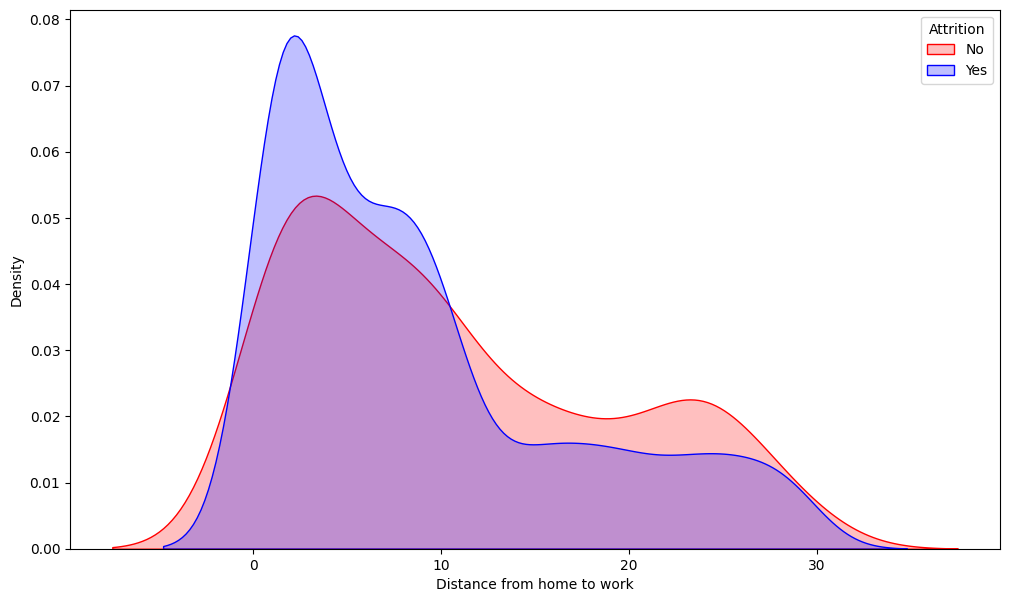

In [155]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['DistanceFromHome'], fill = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], fill = True, color = 'b')
plt.legend(labels=["No","Yes"], title = "Attrition")

plt.xlabel('Distance from home to work')

Text(0.5, 0, 'Years with current manager')

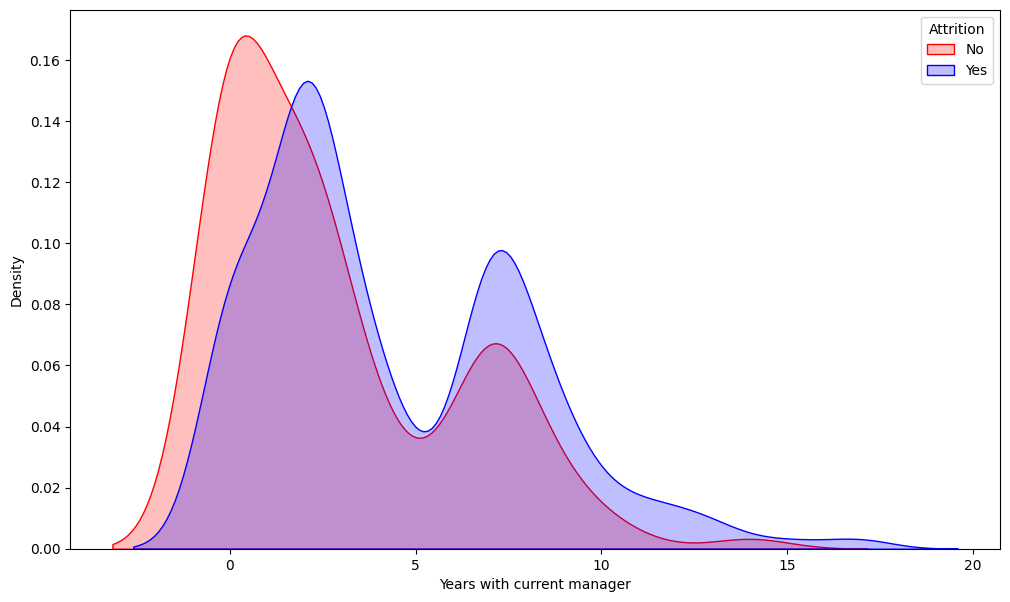

In [156]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], fill = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], fill = True, color = 'b')
plt.legend(labels=["No","Yes"], title = "Attrition")

plt.xlabel('Years with current manager')

Text(0.5, 0, 'Total Working Years')

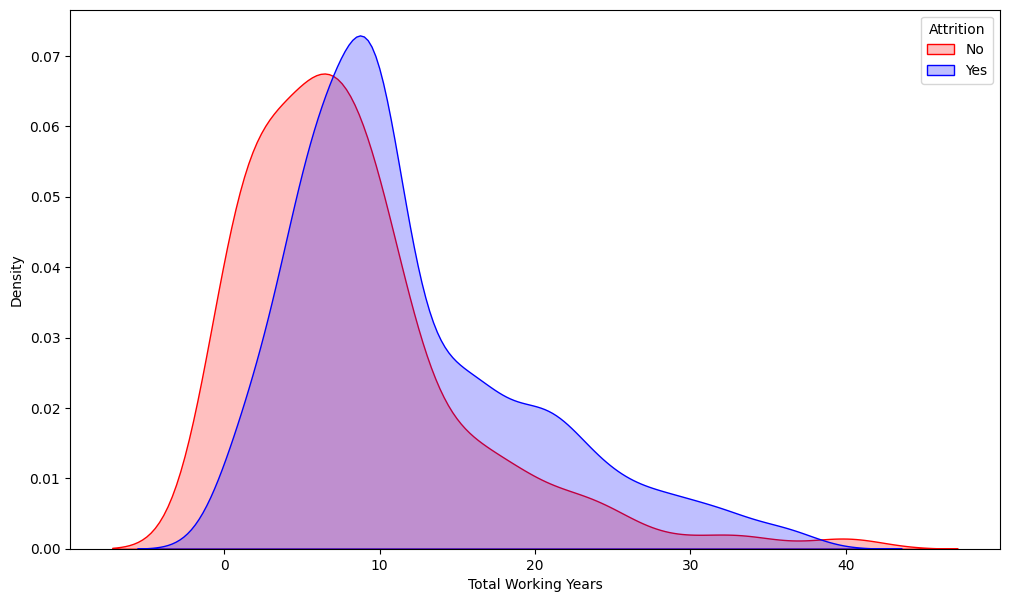

In [157]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], fill = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], fill = True, color = 'b')
plt.legend(labels=["No","Yes"], title = "Attrition")

plt.xlabel('Total Working Years')

<AxesSubplot: xlabel='MonthlyIncome', ylabel='Gender'>

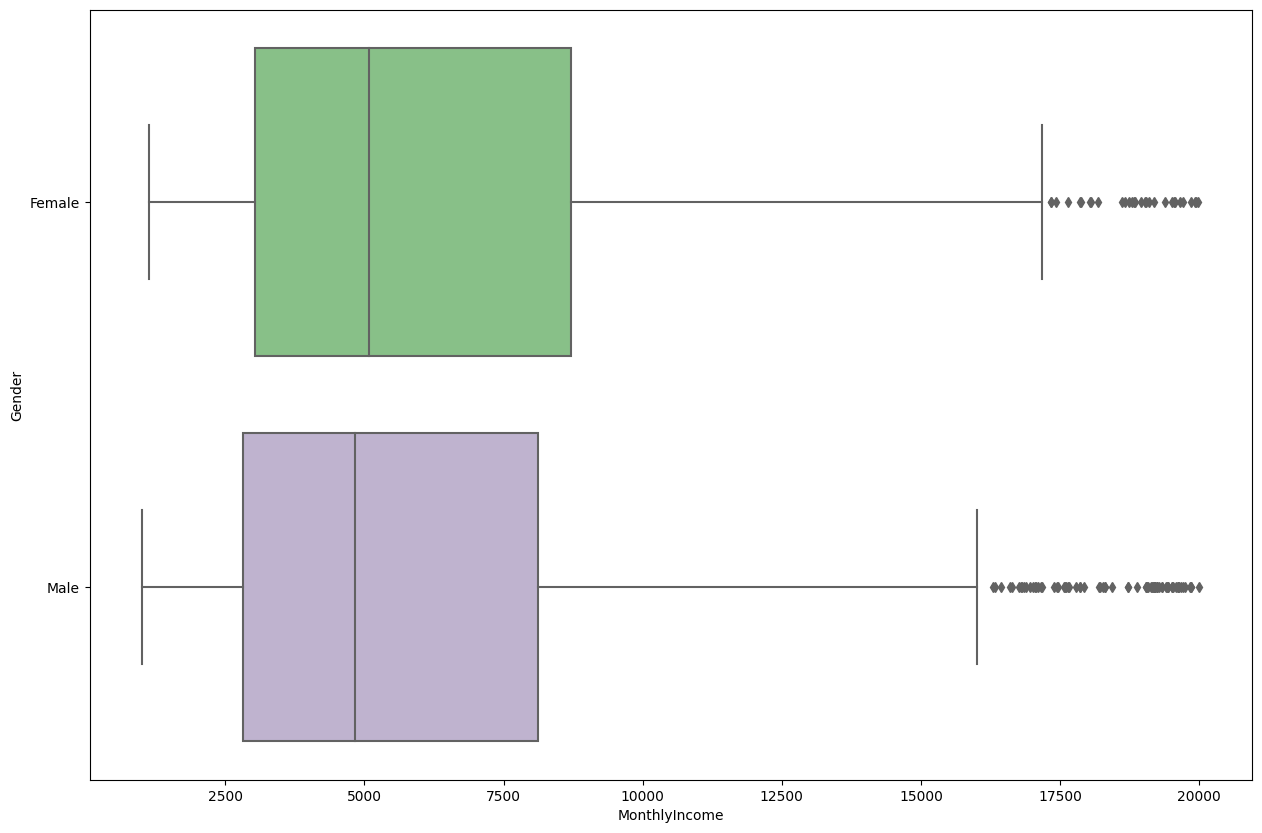

In [158]:
# Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df, palette="Accent")

<AxesSubplot: xlabel='MonthlyIncome', ylabel='JobRole'>

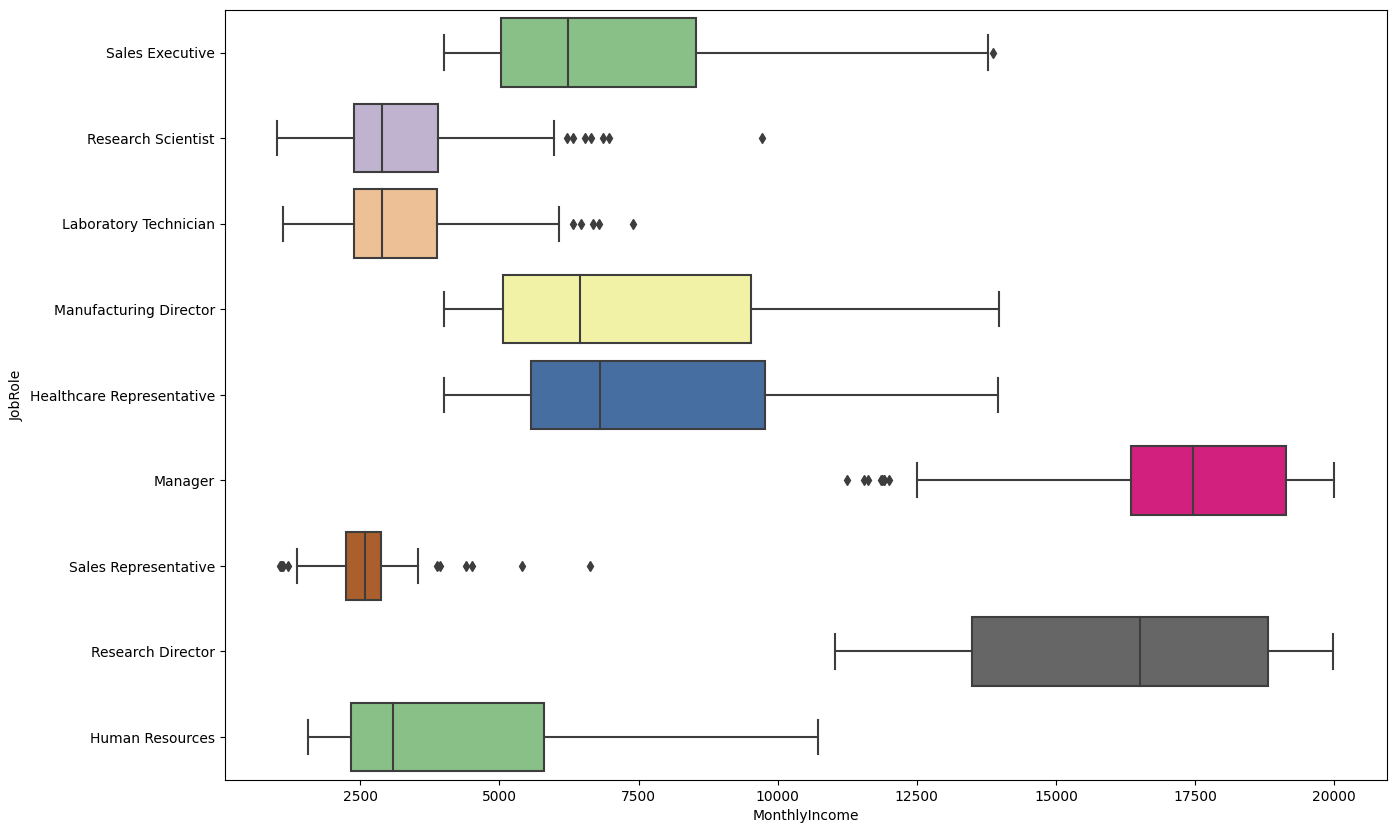

In [159]:
# Monthly Income vs. Job Role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df, palette="Accent")

In [160]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [161]:
#Separate Y to X

x_employee = employee_df.drop("Attrition", axis=1)
y_employee = employee_df["Attrition"].copy()

In [162]:
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Transformer designed to easily scale only selected columns
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_copy = X.copy()
        scale_attrs = X_copy[self.attributes]
        robust_scaler = RobustScaler()
        X_scaled = robust_scaler.fit_transform(scale_attrs)
        X_scaled = pd.DataFrame(X_scaled, columns=self.attributes, index=X_copy.index)
        for attr in self.attributes:
            X_copy[attr] = X_scaled[attr]
        return X_copy

In [163]:
# One-hot-encoding of categorical variables

cat_cols = x_employee.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_employee.select_dtypes(include=['float64', 'int']).columns.to_list()

In [164]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [165]:
custom_scaler = CustomScaler(numeric_cols)
x_employee_scaled = custom_scaler.fit_transform(x_employee)

In [166]:
x_employee_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,Travel_Rarely,0.433526,Sales,-0.500000,-0.5,Life Sciences,-0.5,Female,0.783217,0.0,0.0,Sales Executive,0.5,Single,0.196416,0.422369,2.000000,1.0,-0.500000,0.0,-1.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4
1,1.000000,Travel_Frequently,-0.755780,Research & Development,0.083333,-1.0,Life Sciences,0.0,Male,-0.139860,-1.0,0.0,Research Scientist,-0.5,Married,0.038588,0.859600,-0.333333,0.0,1.500000,1.0,0.5,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,Travel_Rarely,0.825145,Research & Development,-0.416667,-0.5,Other,0.5,Male,0.727273,-1.0,-0.5,Laboratory Technician,0.0,Single,-0.517374,-0.953683,1.333333,1.0,0.166667,0.0,-0.5,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,Travel_Frequently,0.852601,Research & Development,-0.333333,0.5,Life Sciences,0.5,Female,-0.279720,0.0,-0.5,Research Scientist,0.0,Married,-0.367593,0.718797,-0.333333,1.0,-0.500000,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,Travel_Rarely,-0.304913,Research & Development,-0.416667,-1.0,Medical,-1.0,Male,-0.727273,0.0,-0.5,Laboratory Technician,-0.5,Married,-0.265362,0.193040,2.333333,0.0,-0.333333,0.0,0.5,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,Travel_Frequently,0.118497,Research & Development,1.333333,-0.5,Medical,0.0,Male,-0.699301,1.0,0.0,Laboratory Technician,0.5,Married,-0.429407,-0.156712,0.666667,0.0,0.500000,0.0,0.0,0.0,0.777778,0.0,0.0,0.000000,-0.2,-0.333333,0.0
1466,0.230769,Travel_Rarely,-0.273121,Research & Development,-0.083333,-1.0,Medical,0.5,Male,-0.671329,-1.0,0.5,Healthcare Representative,-1.0,Married,0.927579,0.581699,0.666667,0.0,0.166667,0.0,-1.0,0.0,-0.111111,2.0,0.0,0.333333,0.8,0.000000,0.8
1467,-0.692308,Travel_Rarely,-0.934971,Research & Development,-0.250000,0.0,Life Sciences,-0.5,Male,0.587413,1.0,0.0,Manufacturing Director,-0.5,Married,0.223665,-0.729913,-0.333333,1.0,1.000000,1.0,-0.5,0.0,-0.444444,-3.0,0.0,0.166667,-0.2,-0.333333,0.0
1468,1.000000,Travel_Frequently,0.319364,Sales,-0.416667,0.0,Medical,0.5,Male,-0.083916,-1.0,0.0,Sales Executive,-0.5,Married,0.086138,-0.079947,0.000000,0.0,0.000000,0.0,0.5,-1.0,0.777778,0.0,-1.0,0.666667,0.6,-0.333333,1.0


In [167]:
x_employee_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   float64
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   float64
 8   Gender                    1470 non-null   object 
 9   HourlyRate                1470 non-null   float64
 10  JobInvolvement            1470 non-null   float64
 11  JobLevel                  1470 non-null   float64
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   float64
 14  MaritalS

In [168]:
# Transformer to encode only the categorical columns and return a DataFrame

from sklearn.preprocessing import OneHotEncoder

class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse_output=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [169]:
custom_oh = CustomOneHotEncoding()
x_employee_scaled = custom_oh.fit_transform(x_employee_scaled)

In [170]:
x_employee_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.384615,0.433526,-0.500000,-0.5,-0.5,0.783217,0.0,0.0,0.5,0.196416,0.422369,2.000000,1.0,-0.500000,0.0,-1.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.000000,-0.755780,0.083333,-1.0,0.0,-0.139860,-1.0,0.0,-0.5,0.038588,0.859600,-0.333333,0.0,1.500000,1.0,0.5,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.076923,0.825145,-0.416667,-0.5,0.5,0.727273,-1.0,-0.5,0.0,-0.517374,-0.953683,1.333333,1.0,0.166667,0.0,-0.5,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.230769,0.852601,-0.333333,0.5,0.5,-0.279720,0.0,-0.5,0.0,-0.367593,0.718797,-0.333333,1.0,-0.500000,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.692308,-0.304913,-0.416667,-1.0,-1.0,-0.727273,0.0,-0.5,-0.5,-0.265362,0.193040,2.333333,0.0,-0.333333,0.0,0.5,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.000000,0.118497,1.333333,-0.5,0.0,-0.699301,1.0,0.0,0.5,-0.429407,-0.156712,0.666667,0.0,0.500000,0.0,0.0,0.0,0.777778,0.0,0.0,0.000000,-0.2,-0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.230769,-0.273121,-0.083333,-1.0,0.5,-0.671329,-1.0,0.5,-1.0,0.927579,0.581699,0.666667,0.0,0.166667,0.0,-1.0,0.0,-0.111111,2.0,0.0,0.333333,0.8,0.000000,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,-0.692308,-0.934971,-0.250000,0.0,-0.5,0.587413,1.0,0.0,-0.5,0.223665,-0.729913,-0.333333,1.0,1.000000,1.0,-0.5,0.0,-0.444444,-3.0,0.0,0.166667,-0.2,-0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1.000000,0.319364,-0.416667,0.0,0.5,-0.083916,-1.0,0.0,-0.5,0.086138,-0.079947,0.000000,0.0,0.000000,0.0,0.5,-1.0,0.777778,0.0,-1.0,0.666667,0.6,-0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [171]:
x_employee_scaled.describe(include='all')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.071062,0.000702,0.182710,-0.043537,-0.139116,-0.003045,-0.270068,0.031973,-0.135714,0.289673,0.006251,0.231066,0.282993,0.201587,0.153741,-0.143878,-0.206122,0.142177,-0.200680,-0.238776,0.334694,0.245850,0.395918,0.224626,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.400000,0.600000,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,0.702721,0.583106,0.675572,0.512082,0.546541,0.568655,0.711561,0.553470,0.551423,0.861002,0.573345,0.832670,0.450606,0.609990,0.360824,0.540604,0.852077,0.864531,1.289271,0.706476,1.021088,0.724627,1.074143,0.713627,0.302805,0.391193,0.454137,0.202604,0.475939,0.459884,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.490065,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,-1.384615,-1.011561,-0.500000,-1.000000,-1.000000,-1.006993,-2.000000,-0.500000,-1.000000,-0.715069,-0.978010,-0.666667,0.000000,-0.500000,0.000000,-1.000000,-1.000000,-1.111111,-3.000000,-2.000000,-0.833333,-0.600000,-0.333333,-0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.461538,-0.486994,-0.416667,-0.500000,-0.500000,-0.503497,-1.000000,-0.500000,-0.500000,-0.367228,-0.498490,-0.333333,0.000000,-0.333333,0.000000,-0.500000,-1.000000,-0.444444,-1.000000,-1.000000,-0.333333,-0.200000,-0.333333,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.513006,0.58

In [172]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_employee_scaled, y_employee, test_size = 0.25)

In [173]:
X_train_scaled.shape

(1102, 50)

In [174]:
X_test_scaled.shape

(368, 50)

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train_scaled)

y_pred = model.predict(X_test_scaled)

In [176]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test_scaled)))

Accuracy 87.77173913043478 %


<AxesSubplot: >

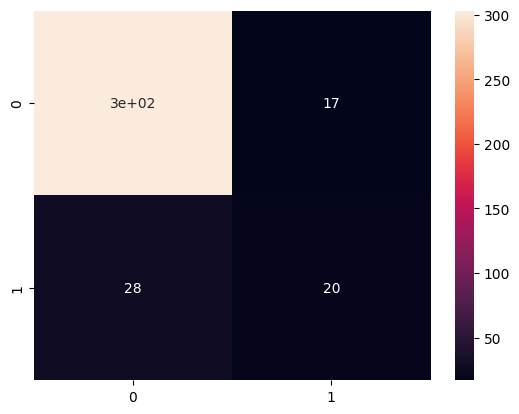

In [177]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test_scaled, y_pred)
sns.heatmap(cm, annot=True)

In [178]:
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       320
           1       0.54      0.42      0.47        48

    accuracy                           0.88       368
   macro avg       0.73      0.68      0.70       368
weighted avg       0.87      0.88      0.87       368



# Random Forest

In [207]:
#Separate Y to X

x_employee = employee_df.drop("Attrition", axis=1)
y_employee = employee_df["Attrition"].copy()

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x_employee, y_employee, test_size = 0.25)

In [209]:
custom_scaler = CustomScaler(numeric_cols)
X_train_scaled = custom_scaler.fit_transform(X_train)
X_test_scaled = custom_scaler.fit_transform(X_test)

### We will check if the model works better with scaled data or not. The Random Forest method should work better with unscaled data. Scaled data can cause overfitting.

In [210]:
custom_oh = CustomOneHotEncoding()
X_train = custom_oh.fit_transform(X_train)
X_test = custom_oh.fit_transform(X_test)
X_train_scaled = custom_oh.fit_transform(X_train_scaled)
X_test_scaled = custom_oh.fit_transform(X_test_scaled)

In [211]:
from sklearn.ensemble import RandomForestClassifier

# Model trained on the unscaled dataset
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [212]:
# Model trained on the scaled dataset
clf_rnd_scaled = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [213]:
y_train_pred = clf_rnd.predict(X_train)
y_train_prep_pred = clf_rnd_scaled.predict(X_train_scaled)

In [227]:
from sklearn.metrics import f1_score

def evaluate_result(y_true, y_pred, y_prep, y_prep_pred, metric):
    print(metric.__name__, "WITHOUT preparation:", metric(y_true, y_pred, average='weighted'))
    print(metric.__name__, "WITH preparation:", metric(y_prep, y_prep_pred, average='weighted'))

In [228]:
# Compare results between scaled and unscaled
evaluate_result(y_train, y_train_pred,  y_train, y_train_prep_pred, f1_score)

f1_score WITHOUT preparation: 1.0
f1_score WITH preparation: 1.0


In [216]:
# Predict with the test data set
y_pred = clf_rnd.predict(X_test)
y_prep_pred = clf_rnd_scaled.predict(X_test_scaled)

In [230]:
# Compare results between scaled and unscaled
evaluate_result(y_test, y_pred, y_test, y_prep_pred, f1_score)

f1_score WITHOUT preparation: 0.8081020071722418
f1_score WITH preparation: 0.7947592580411762


<AxesSubplot: >

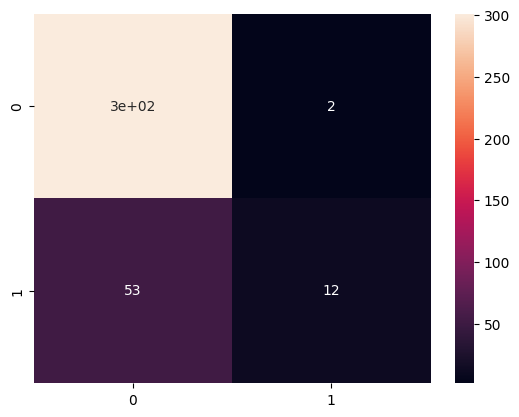

In [231]:
# Results in Test Set unscaled
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

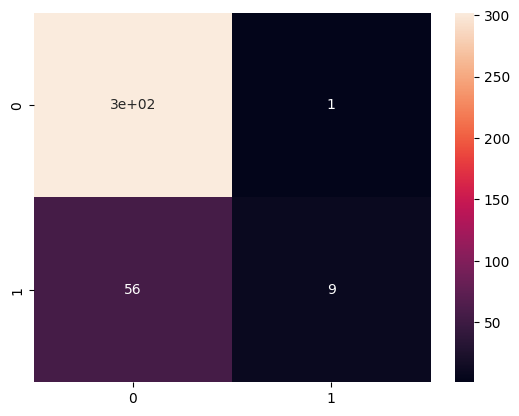

In [232]:
# Results in Test Set Scaled
cm = confusion_matrix( y_test, y_prep_pred)
sns.heatmap(cm, annot=True)

In [233]:
# Results in Test Set unscaled

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       303
           1       0.86      0.18      0.30        65

    accuracy                           0.85       368
   macro avg       0.85      0.59      0.61       368
weighted avg       0.85      0.85      0.81       368



In [226]:
# Results in Test Set scaled
print(classification_report(y_test, y_prep_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       303
           1       0.90      0.14      0.24        65

    accuracy                           0.85       368
   macro avg       0.87      0.57      0.58       368
weighted avg       0.85      0.85      0.79       368



In [234]:
# For Random Forest it is better not to scale the data. In this example there is almost no difference but there may be more.

In [236]:
import tensorflow as tf

In [248]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [249]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [250]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [261]:
epochs_hist = model.fit(X_train_scaled, y_train, epochs = 100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8575
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.8902
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9220
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1866 - accuracy: 0.9338
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1276 - accuracy: 0.9537
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1079 - accuracy: 0.9619
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9746
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9873
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9936
Epoch 11/

In [262]:
y_pred = model.predict(X_test_scaled)
y_pred

12/12 [==============================] - 0s 2ms/step


array([[1.76526199e-21],
       [8.98505367e-11],
       [3.97329786e-05],
       [5.12854854e-07],
       [6.54199332e-16],
       [9.78566783e-10],
       [1.45993573e-09],
       [1.48122408e-05],
       [3.00959790e-08],
       [8.08992554e-05],
       [7.96340327e-10],
       [1.06943577e-11],
       [1.66964109e-09],
       [2.27147510e-04],
       [2.14264904e-15],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.15644168e-12],
       [6.35621807e-12],
       [1.06425703e-01],
       [7.67349832e-07],
       [4.28569073e-12],
       [2.09356821e-09],
       [9.99300480e-01],
       [1.00000000e+00],
       [1.65020901e-04],
       [1.12160334e-08],
       [3.25823452e-10],
       [1.26196767e-06],
       [1.64220525e-12],
       [6.92512769e-10],
       [5.97622646e-13],
       [4.76140376e-05],
       [2.17857821e-09],
       [3.70621393e-07],
       [4.79828434e-11],
       [9.99956310e-01],
       [6.92957925e-14],
       [2.10512894e-06],
       [3.17642986e-07],


In [263]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [264]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

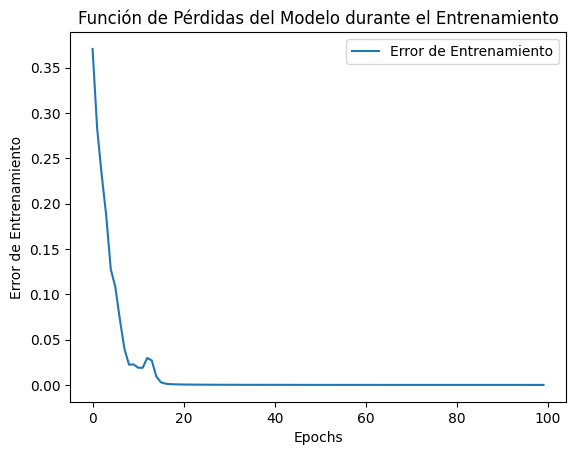

In [265]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

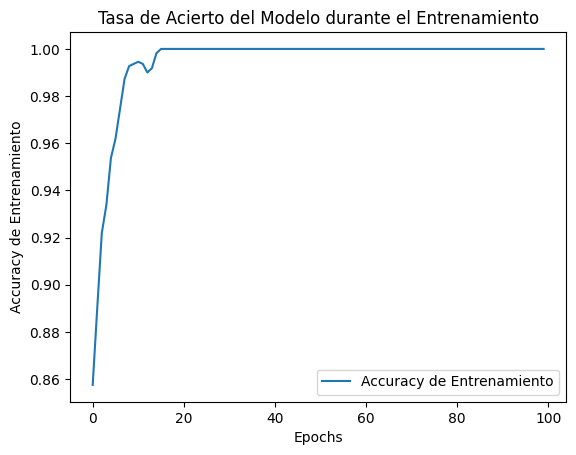

In [266]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

<AxesSubplot: >

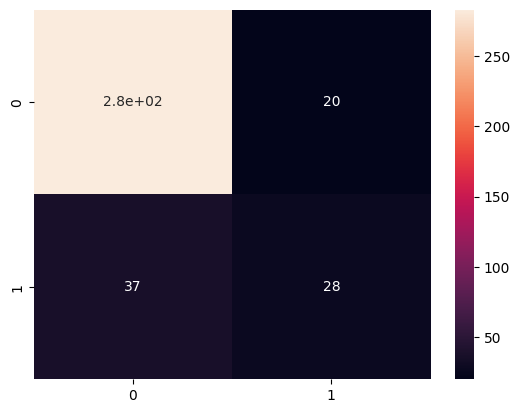

In [267]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       303
           1       0.58      0.43      0.50        65

    accuracy                           0.85       368
   macro avg       0.73      0.68      0.70       368
weighted avg       0.83      0.85      0.84       368

